# IMPORT THE IMPORTANT LIBRARIES

In [1]:
# Time module for measuring the execution time of operations
import time
# Pandas for data manipulation and analysis, especially handling tabular data
import pandas as pd
# NumPy for numerical computations and array manipulations
import numpy as np
# Matplotlib for plotting and visualizing data
import matplotlib.pyplot as plt
# Inline backend for displaying Matplotlib plots in Jupyter Notebooks
%matplotlib inline
# Seaborn for creating visually appealing statistical graphics
import seaborn as sns
sns.set_style('whitegrid')  # Setting the theme to white grid for better visuals
# OS module for interacting with the operating system (e.g., file handling)
import os
# System module for interacting with Python runtime environment
import sys
# Regular expressions module for text cleaning and pattern matching
import re
# String module for handling string-related operations
import string
# Gensim for advanced text processing, including topic modeling and n-gram models
import gensim
from gensim.utils import simple_preprocess  # Tokenizes and preprocesses text
from gensim.parsing.preprocessing import STOPWORDS  # Predefined list of stopwords
from gensim.models.phrases import Phraser, Phrases, ENGLISH_CONNECTOR_WORDS  # For n-gram and phrase modeling
# SpaCy for advanced text processing, such as lemmatization
import spacy
# WordCloud for creating word cloud visualizations
from wordcloud import WordCloud
# Termcolor for adding colors to text in the terminal
from termcolor import colored
# Setting Pandas display options for better visibility of DataFrame content
pd.set_option('display.max_colwidth', None)  # Show full length of strings in cells
pd.set_option('display.max_columns', None)  # Display all columns in DataFrames

# Warnings module for filtering out unwanted warning messages
import warnings
warnings.filterwarnings('ignore') # Ignore warnings for cleaner output

C:\Users\user\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# IMPORT THE DATASET

In [2]:
# Import and create training set
df_train = pd.read_csv("train.csv")

In [3]:
# Display df_train
df_train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,Iraq Halts Oil Exports from Main Southern Pipeline (Reuters),"Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP)","AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [4]:
# Import and create test set
df_test = pd.read_csv("test.csv")

In [5]:
#Display df_test
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.
1,4,The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com),"SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
2,4,Ky. Company Wins Grant to Study Peptides (AP),"AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
3,4,Prediction Unit Helps Forecast Wildfires (AP),"AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar."
4,4,Calif. Aims to Limit Farm-Related Smog (AP),"AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure."


In [6]:
print(f'Train Dataset: {df_train.shape}')

print(f'\nTest Dataset: {df_test.shape}')

Train Dataset: (120000, 3)

Test Dataset: (7600, 3)


# Create a copy of the train dataset

In [7]:
# Create a copy of the 'df_train' DataFrame and store 'news_df'
news_df = df_train.copy()

In [8]:
# Combine the 'Title' and 'Description' columns into a new 'news' column
news_df['news'] = df_train['Title'] + " " + df_train['Description']

In [9]:
# Drop the 'Title' and 'Description' columns from 'news_df'
news_df.drop(columns=['Title', 'Description'], inplace=True)

In [10]:
# Display the resulting DataFrame
news_df.head()

,Class Index,news
0,3,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.
3,3,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
4,3,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."


In [11]:
# Display summary information of news_df
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   news         120000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [12]:
# Count the occurrences of each unique value in the 'Class Index' column
news_df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

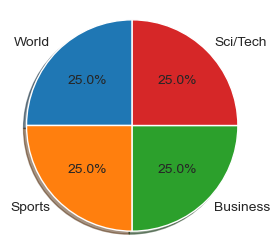

In [13]:
# Get unique class indices
labels = news_df['Class Index'].unique()
# Define real labels
real_labels = ['World', 'Sports', 'Business', 'Sci/Tech']
# list to store sizes of each class
sizes = []
# Iterate over each unique class index
for i in labels:
    # Calculate the size of each class
    size = len(news_df[news_df['Class Index'] == i])
    sizes.append(size)
# Create a pie chart to visualize the distribution of classes
fig = plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=real_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
# Display the chart
plt.show()

# ASSIGN THE TRAINING AND TESTING DATA

In [14]:
# Assign training data
x_train = news_df['news']
y_train = news_df['Class Index']

In [15]:
# Assign testing data
x_test = df_test['Description']
y_test = df_test['Class Index']

# Preprocessing the Data (used for ML classifiers)

In [16]:
def process_description(description):
    # Remove HTML Tag
    pattern = re.compile(r'<.*?>')
    description = description.map(lambda x: re.sub(pattern, '', x))
    # Removal of URL
    pattern = re.compile(r'https?://\S+|www\.\S+')
    description = description.map(lambda x: re.sub(pattern, '', x).strip())
    # Convert the to lowercase
    description = description.map(lambda x: x.lower())
    ## tokenize description
    def sent_to_words(sentences):
        for sentence in sentences:
            yield(simple_preprocess(str(sentence), deacc=False))
    data = description.tolist()
    disc_tokens = list(sent_to_words(data))
    ## Remove punctuation
    disc_tokens = [[token for token in sentence if token not in string.punctuation] for sentence in disc_tokens]
    ## Remove numbers
    disc_tokens = [[token for token in sentence if token not in string.digits] for sentence in disc_tokens]
    ## lemmatization: keeping only noun, adj, vb, adv
    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
        nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out
    description_lem = lemmatization(disc_tokens)
    ## remove_stopwords
    my_stop_words = STOPWORDS.union(set(['company', 'year', 'yesterday', 'week', 'new', 'reuter']))
    description_clean = [[token for token in sentence if token not in my_stop_words] for sentence in description_lem]
    ## Build the bigram model
    bigram = Phrases(description_clean, min_count=5, threshold=100) # higher threshold fewer phrases.
    ## Get phrases (bigrams)
    bigram_mod = Phraser(bigram)
    description_clean = [bigram_mod[sentence] for sentence in description_clean]
    return description_clean

In [ ]:
# Process the news in the training and testing data
x_train_clean = process_description(x_train)
x_test_clean = process_description(x_test)
# Combine the processed descriptions from both training and testing data
x_clean = x_train_clean + x_test_clean
# Concatenate the labels from both training and testing data
Y = pd.concat([y_train, y_test]).reset_index(drop=True)
# Print a sample original description and its processed version
print('\033[92m' + 'A sample original description\n', x_train[0])
print('\033[94m'+'\nProcessed description\n', x_train_clean[0])

# EDA: Frequency And Visualization

In [ ]:
def getWordCloud(words):
    # Combine all words into a single text string.
    text = ' '.join(words)
    # Generate a word cloud image.
    wordcloud = WordCloud().generate(text)
    # Display the generated image using matplotlib.
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # Create a new word cloud with adjusted font size.
    wordcloud = WordCloud(max_font_size=40).generate(text)
    # Create a new figure and display the adjusted word cloud.
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # Show the word cloud
    plt.show()

# WORD CLOUD OF ALL THE LIST

In [ ]:
word_list = []
for senc in x_clean:
    # Combine words in each sentence into a single string.
    merged = ' '.join(senc)
    word_list.append(merged)
# Generate and display a word cloud
getWordCloud(word_list)

In [ ]:
# Separate the items based on the labels
world_news = []
sports_news = []
business_news = []
Tech_sci_news = []
# Iterate through cleaned data and labels.
for data, label in zip(x_clean, Y):
    # Categorize data based on label.
    if label == 1:
        world_news.append(data)
    elif label == 2:
        sports_news.append(data)
    elif label == 3:
        business_news.append(data)
    else:
        Tech_sci_news.append(data)

# WORLD NEWS WORD CLOUD

In [ ]:
word_list = []
for senc in world_news:
    # Combine words in each sentence into a single string.
    merged = ' '.join(senc)
    word_list.append(merged)
# Generate and display a word cloud
getWordCloud(word_list)

# SPORTS NEWS WORD CLOUD

In [ ]:
word_list = []
for senc in sports_news:
    # Combine words in each sentence into a single string.
    merged = ' '.join(senc)
    word_list.append(merged)
# Generate and display a word cloud
getWordCloud(word_list)

# Business News wordCloud

In [ ]:
word_list = []
for senc in business_news:
    # Combine words in each sentence into a single string.
    merged = ' '.join(senc)
    word_list.append(merged)
# Generate and display a word cloud
getWordCloud(word_list)

# Scientific-Technology News Word_Cloud

In [ ]:
word_list = []
for senc in Tech_sci_news:
    # Combine words in each sentence into a single string.
    merged = ' '.join(senc)
    word_list.append(merged)
# Generate and display a word cloud
getWordCloud(word_list)

# WORD FREQUENCIES

In [ ]:
def build_freqs(news, topic):
    # Convert topic array to list
    topic_list = np.squeeze(topic).tolist()
    freqs = {}
    # Iterate through news and topics
    for disc, y in zip(news, topic_list):
        # Iterate through words in each disc
        for word in disc:
            pair = (word, y)
            # Increment frequency for (word, topic) pair
            freqs[pair] = freqs.get(pair, 0) + 1
    return freqs

In [ ]:
# create frequency dictionary
freqs = build_freqs(x_clean, Y)
# check data type
print(f'type(freqs) = {type(freqs)}')
# check length of the dictionary
print(f'len(freqs) = {len(freqs)}\n')
print(freqs)

In [ ]:
words = list(set([item for sublist in x_clean for item in sublist]))
word_list = []
# Iterate through unique words
for word in words:
    # Get frequencies for each label
    freq_label_1 = freqs.get((word, 1), 0)
    freq_label_2 = freqs.get((word, 2), 0)
    freq_label_3 = freqs.get((word, 3), 0)
    freq_label_4 = freqs.get((word, 4), 0)
data = []
# Loop through selected words
for word in words:
    # Initialize counts for each class
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    # Retrieve counts for each class
    if (word, 1) in freqs:
        count_1 = freqs[(word, 1)]
    if (word, 2) in freqs:
        count_2 = freqs[(word, 2)]
    if (word, 3) in freqs:
        count_3 = freqs[(word, 3)]
    if (word, 4) in freqs:
        count_4 = freqs[(word, 4)]
    # Append the word counts to the table
    data.append([word, count_1, count_2, count_3, count_4])
data

# VISUALISATION OF FREQUENT WORDS

# FOR WORLD NEWS

In [ ]:
# Create a dictionary of world words with their frequencies
world_words = {word[0]: word[1] for word in data if word[1] == max(word[1:5])}
# Sort the world words by frequency
sorted_words = sorted(world_words.items(), key=lambda x: x[1], reverse=True)
# Select the top 10 most frequent words
top_10_words = sorted_words[:10]
# Extract words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]
# Plot the bar chart
plt.figure(figsize=(5, 4))
plt.bar(words, frequencies)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Frequent Words for World News', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# FOR SPORTS NEWS

In [ ]:
# Create a dictionary of sports words with their frequencies
sports_words = {word[0]: word[2] for word in data if word[2] == max(word[1:5])}
# Sort the sports words by frequency
sorted_words = sorted(sports_words.items(), key=lambda x: x[1], reverse=True)
# Select the top 10 most frequent words
top_10_words = sorted_words[:10]
# Extract words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]
# Plot the bar chart
plt.figure(figsize=(5, 4))
plt.bar(words, frequencies)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Frequent Words for Sports News', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# FOR BUSINESS NEWS

In [ ]:
# Create a dictionary of business words with their frequencies
business_words = {word[0]: word[3] for word in data if word[3] == max(word[1:5])}
# Sort the business words by frequency
sorted_words = sorted(business_words.items(), key=lambda x: x[1], reverse=True)
# Select the top 10 most frequent words
top_10_words = sorted_words[:10]
# Extract words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]
# Plot the bar chart
plt.figure(figsize=(5, 4))
plt.bar(words, frequencies)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Frequent Words for Business News', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# FOR SCIENCE AND TECHNOLOGY NEWS

In [ ]:
# Create a dictionary of sci_tech words with their frequencies
sci_tech_words = {word[0]: word[4] for word in data if word[4] == max(word[1:5])}
# Sort the sci_tech words by frequency
sorted_words = sorted(sci_tech_words.items(), key=lambda x: x[1], reverse=True)
# Select the top 10 most frequent words
top_10_words = sorted_words[:10]
# Extract words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]
# Plot the bar chart
plt.figure(figsize=(5, 4))
plt.bar(words, frequencies)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Frequent Words for Sci_Tech News', fontsize=12)
plt.xticks(rotation=60, fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# Machine Learning Models

In [ ]:
# Scikit-learn for machine learning models and utilities
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF features
from sklearn.metrics import classification_report, confusion_matrix  # Evaluate classification performance
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.metrics import accuracy_score  # Measure model accuracy
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for text data
from sklearn.linear_model import LogisticRegression  # Logistic Regression for classification
from sklearn.svm import SVC  # Support Vector Classifier for text classification
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.pipeline import Pipeline  # Build machine learning pipelines
from sklearn.preprocessing import OneHotEncoder  # Encode categorical variables

# Vectorizing text data in train and test datasets

In [ ]:
# Join tokens in each document into a single string for training data
x_train_join = [' '.join(tokens) for tokens in x_train_clean]
# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit the vectorizer on the training data and transform the training data
x_train_vec = tfidf_vectorizer.fit_transform(x_train_join)
# Transform the test data using the same vectorizer
x_test_join = [' '.join(tokens) for tokens in x_test_clean]
x_test_vec = tfidf_vectorizer.transform(x_test_join)
# Print the shapes of the transformed data
print(f'x_train_vec: {x_train_vec.shape}')
print(f'x_test_vec: {x_test_vec.shape}')

# Generate a visual and textual summary of the classification performance

In [ ]:
def report_confusion_matrix(y_test, y_pred):
    # Define class names
    class_names = ['World', 'Sports', 'Business', 'Sci/Tech']
    # Print classification report
    print(classification_report(y_test, y_pred, target_names=class_names))
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Plot heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Real Labels')
    plt.title('Confusion Matrix')
    plt.show()

# TRADITIONAL MACHINE LEARNING MODELS

# Multinomial Naive Bayes Classifier

In [ ]:
# Building a pipeline
munb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
# Record the starting time for measuring the total runtime
start = time.time()
# Fit the pipeline on the training data
munb.fit(x_train_join, y_train)
# Predict labels for the test data
munb_predict = munb.predict(x_test_join)
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, munb_predict) * 100:.2f} %\n')
# Calculate the total runtime and print the result
tot_time = time.time() - start
print(f"Total Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)\n")
# display confusion matrix
report_confusion_matrix(y_test, munb_predict)

# Hyper Parameter Tuning

In [ ]:
# Define the parameters for grid search
parameters = {'clf__alpha': (1, 1e-2, 1e-3)}
# Initialize GridSearchCV
gs_clf = GridSearchCV(munb, parameters, cv=5, n_jobs=-1)
# Perform grid search
gs_clf = gs_clf.fit(x_train_join, y_train)
# Print the best hyperparameters and the best score
print("Best Hyperparameters:", gs_clf.best_params_)
print("Best Score: ", gs_clf.best_score_)

In [ ]:
# Predict labels using the best estimator found by grid search
mulnb_predict = gs_clf.predict(x_test_join)
# Print the accuracy of the best MultinomialNB model
print(f'MultinomialNB Best Accuracy: {accuracy_score(y_test, mulnb_predict) * 100:.2f} %\n')
# Display confusion matrix
report_confusion_matrix(y_test, mulnb_predict)

# SVM Classifier

In [ ]:
# Building a pipeline for SVM with RBF kernel
svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='rbf'))
])
# Record the starting time for measuring the total runtime
start = time.time()
# Fit the pipeline on the training data
svm.fit(x_train_join, y_train)
# Predict labels for the test data
svm_predict = svm.predict(x_test_join)
# Print accuracy
print(f'Accuracy: {accuracy_score(y_test, svm_predict) * 100:.2f} %\n')
# Calculate the total runtime and print the result
tot_time = time.time() - start
print(f"Total Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)\n")
# Report confusion matrix
report_confusion_matrix(y_test, svm_predict)

# HyperParameter Tuning

In [ ]:
# Define the parameters for grid search
parameters = {
    'clf__C': [0.1, 1, 10],  

    'clf__gamma': [1, 0.1, 0.01], 

    'clf__kernel': ['rbf', 'linear']
}
# Initialize GridSearchCV
gs_clf = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)
# Perform grid search
gs_clf = gs_clf.fit(x_train_join, y_train)
# Print the best hyperparameters and the best score
print("Best Hyperparameters:", gs_clf.best_params_)
print("Best Score: ", gs_clf.best_score_)

In [ ]:
# Predict labels using the best estimator found by grid search
svm_predict = gs_clf.predict(x_test_join)
# Print the accuracy of the best SVM model
print(f'SVM Best Accuracy: {accuracy_score(y_test, svm_predict) * 100:.2f} %\n')
# Display confusion matrix
report_confusion_matrix(y_test, svm_predict)

# Deep Learning Models

In [ ]:
# TensorFlow for deep learning, including neural network models
import tensorflow as tf

# Keras, a high-level API for building and training neural networks
import keras
from tensorflow.keras.preprocessing import sequence  # Preprocessing text for neural networks
from tensorflow.keras.models import Sequential, load_model  # Build and load models
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, GRU  # Neural network layers
from tensorflow.keras.callbacks import EarlyStopping  # Stop training early if performance plateaus
from tensorflow.keras.losses import binary_crossentropy  # Loss function for binary classification
from tensorflow.keras.optimizers import Adam  # Optimizer for training neural networks
from keras.initializers import Constant  # Initialize embedding layers with pre-trained weights